<a href="https://colab.research.google.com/github/mandyzhi/housing-data/blob/main/housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import pandas
import seaborn
import matplotlib.pyplot as plt

housing_data = pandas.read_csv('/content/drive/MyDrive/housing_price_dataset.csv')

224827.32515099045


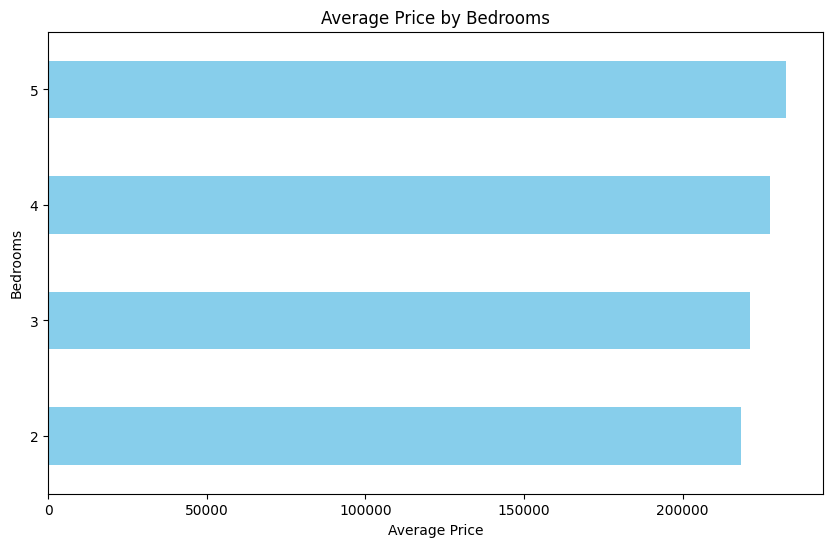

In [40]:
average = housing_data['Price'].mean()
print(average)

average_prices = housing_data.groupby('Bedrooms')['Price'].mean().sort_values()

plt.figure(figsize=(10, 6))
average_prices.plot(kind='barh', color='skyblue')
plt.xlabel('Average Price')
plt.ylabel('Bedrooms')
plt.title('Average Price by Bedrooms')
plt.show()

1. The average price of the houses is $224,827.33

In [ ]:
number_of_houses = len(housing_data)
print(number_of_houses)

50000


The number of houses in this dataset is 50,000 houses.

50000


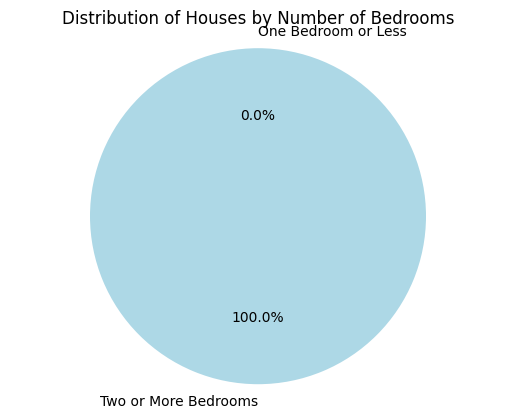

In [42]:

two_or_more_bedrooms = len(housing_data[housing_data["Bedrooms"] >= 2])
one_bedroom_or_less = len(housing_data[housing_data["Bedrooms"] < 2])

print(two_or_more_bedrooms)

sizes = [two_or_more_bedrooms, one_bedroom_or_less]
labels = ['Two or More Bedrooms', 'One Bedroom or Less']
colors = ['lightblue', 'pink']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Houses by Number of Bedrooms')
plt.show()

2. All houses have at least two bedrooms.

3.5038953226049028


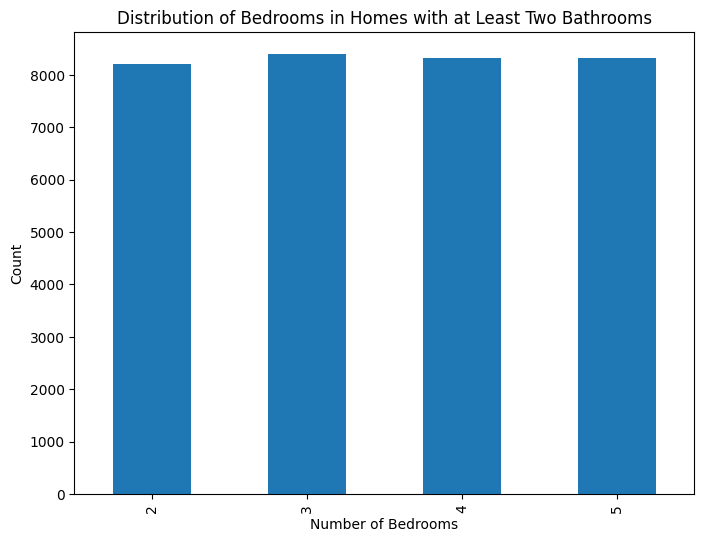

In [34]:
at_least_two_bathrooms = housing_data[housing_data["Bathrooms"] >= 2]

avg_bedrooms = at_least_two_bathrooms["Bedrooms"].sum() / len(at_least_two_bathrooms)

print(avg_bedrooms)

at_least_two_bathrooms["Bedrooms"].value_counts().sort_index().plot(kind='bar', figsize=(8, 6))
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Distribution of Bedrooms in Homes with at Least Two Bathrooms')
plt.show()

3. The average number of bedrooms, houses with 2 or more bathrooms have is 3.5 bedrooms.

       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
7430         2758         5          2        Rural       1967  492195.259972
46610        2957         5          1       Suburb       2001  482577.163405
26930        2995         5          2        Urban       1954  476671.733263
3784         2901         2          3        Urban       1996  470989.679074
21815        2998         3          2        Urban       1995  468493.877841
11322        2888         2          2        Urban       1953  468470.378004
26973        2771         5          2        Urban       1960  467492.827823
49924        2830         3          1       Suburb       1983  463977.238482
25017        2970         4          3        Urban       2005  462557.562958
2845         2999         5          2        Urban       1999  461502.014630


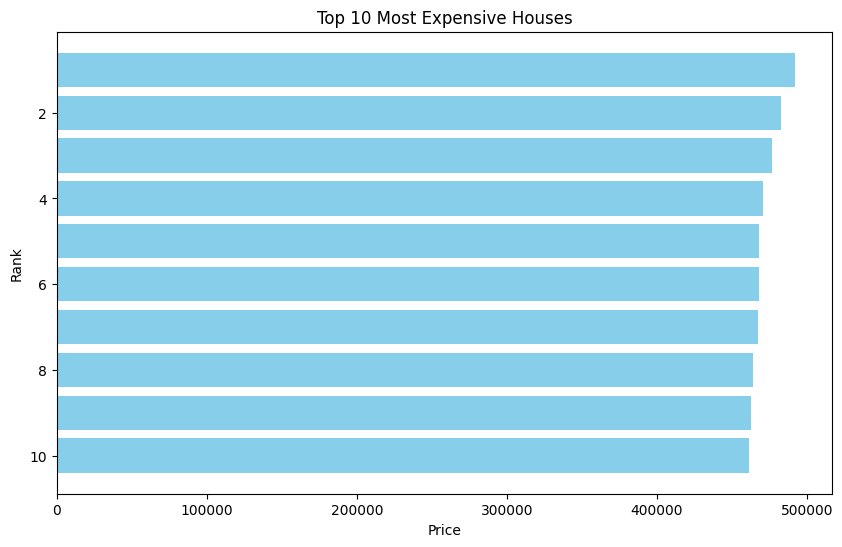

In [43]:
top_10_expensive = housing_data.nlargest(10, 'Price')

print(top_10_expensive)

plt.figure(figsize=(10, 6))
plt.barh(range(1, 11), top_10_expensive['Price'], color='skyblue')
plt.xlabel('Price')
plt.ylabel('Rank')
plt.gca().invert_yaxis()
plt.title('Top 10 Most Expensive Houses')
plt.show()

4. The square feet of the ten most expensive houses, in the order of most expensive to least, are:

  1. 2758 square feet
  2. 2957 square feet
  3. 2995 square feet
  4. 2901 square feet
  5. 2998 square feet
  6. 2888 square feet
  7. 2771 square feet
  8. 2830 square feet
  9. 2970 square feet
  10. 2999 square feet

       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt         Price
33666        1013         5          2        Urban       1960 -36588.165397
      SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
7430        2758         5          2        Rural       1967  492195.259972


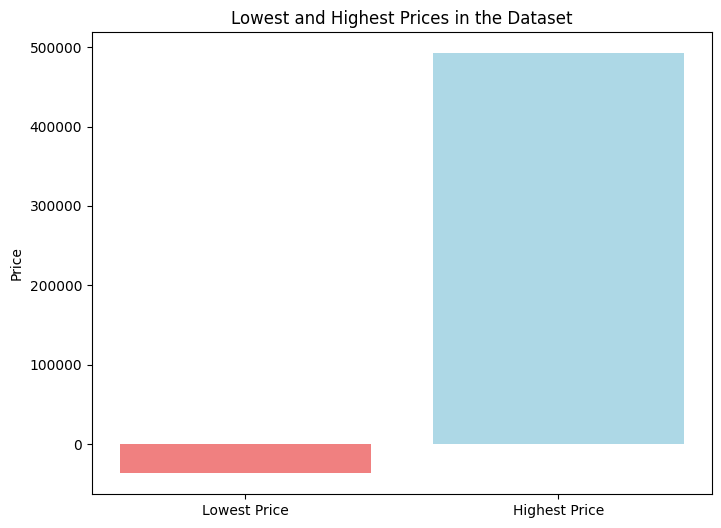

In [44]:
housing_prices = housing_data.sort_values(by=["Price"])

lowest_price = housing_prices.head(1)
highest_price = housing_prices.tail(1)

print(lowest_price)
print(highest_price)

plt.figure(figsize=(8, 6))
plt.bar(['Lowest Price', 'Highest Price'], [lowest_price['Price'].values[0], highest_price['Price'].values[0]], color=['lightcoral', 'lightblue'])
plt.ylabel('Price')
plt.title('Lowest and Highest Prices in the Dataset')
plt.show()

5. The most expensive house was created in year 1967, and the cheapest house was created in year 1960.

2017.4169126061556


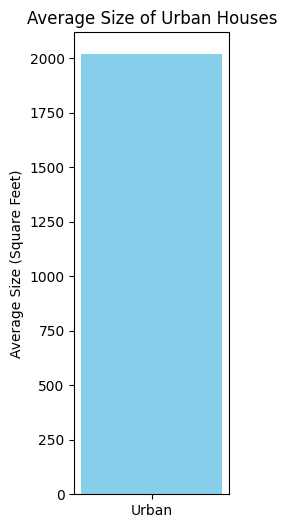

In [46]:
urban_houses = housing_data[housing_data["Neighborhood"] == "Urban"]
urban_houses_average = urban_houses["SquareFeet"].mean()

print(urban_houses_average)

plt.figure(figsize=(2, 6))
plt.bar(['Urban'], [urban_houses_average], color='skyblue')
plt.ylabel('Average Size (Square Feet)')
plt.title('Average Size of Urban Houses')
plt.show()

6. The average size of Urban houses is 2017.4 square feet.

2001.621132165987


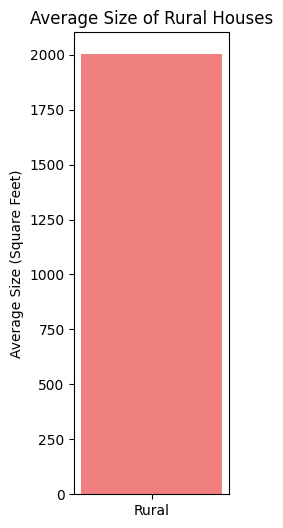

In [50]:
rural_houses = housing_data[housing_data["Neighborhood"] == "Rural"]

rural_houses_average = rural_houses["SquareFeet"].mean()

print(rural_houses_average)

plt.figure(figsize=(2, 6))
plt.bar(['Rural'], [rural_houses_average], color="lightcoral")
plt.ylabel("Average Size (Square Feet)")
plt.title("Average Size of Rural Houses")
plt.show()

7. The average size of Rural houses is 2001.6 square feet.

33.51


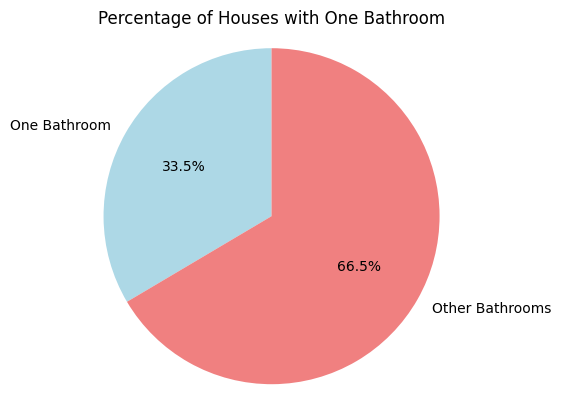

In [51]:
one_bathroom = housing_data[housing_data["Bathrooms"] == 1]
percentage_one_bathroom = len(one_bathroom) / len(housing_data) * 100

print(percentage_one_bathroom)

labels = ['One Bathroom', 'Other Bathrooms']
sizes = [percentage_one_bathroom, 100 - percentage_one_bathroom]
colors = ['lightblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Houses with One Bathroom')
plt.show()

8. 33.51% of houses have one bathroom.

4183


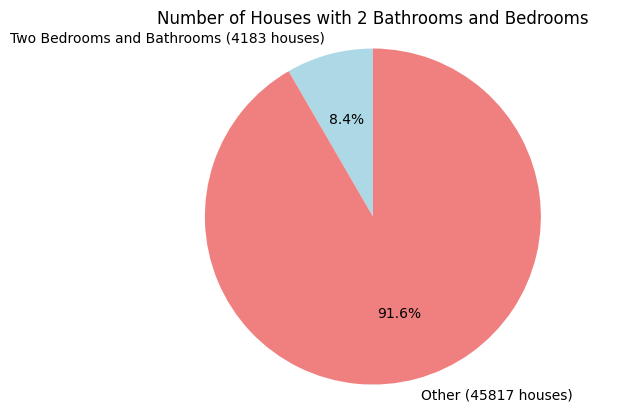

In [54]:
two_bedroom_two_bathroom = housing_data[(housing_data["Bedrooms"] == 2) & (housing_data["Bathrooms"] == 2)]

num_two_bedroom_two_bathroom = len(two_bedroom_two_bathroom)
num_other_houses = len(housing_data) - num_two_bedroom_two_bathroom

print(len(two_bedroom_two_bathroom))

labels = [f'Two Bedrooms and Bathrooms ({num_two_bedroom_two_bathroom} houses)', f'Other ({num_other_houses} houses)']
sizes = [num_two_bedroom_two_bathroom, num_other_houses]
colors = ('lightblue', 'lightcoral')

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Number of Houses with 2 Bathrooms and Bedrooms')
plt.show()

9. 4183 houses have two bedrooms and two bathrooms.

225291.3031288047


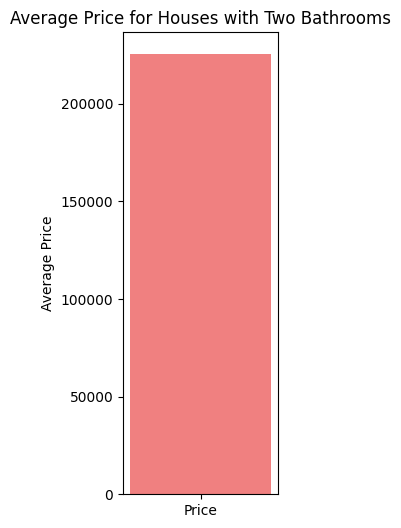

In [56]:
two_bathrooms = housing_data[housing_data["Bathrooms"] == 2]
two_bathroom_avg = two_bathrooms["Price"].mean()

print(two_bathroom_avg)

plt.figure(figsize=(2, 6))
plt.bar(['Price'], [two_bathroom_avg], color="lightcoral")
plt.ylabel("Average Price")
plt.title("Average Price for Houses with Two Bathrooms")
plt.show()

10. The average price for houses with two bathrooms is 225,291.30.